**Import library yang akan digunakan** 


In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv("wayangData.csv", sep=";")

In [62]:
print(df.head())
print(df.columns)

                                            sentimen    label
0  Bambang Gandawardaya ternyata sangat sakti dan...  positif
1  Patih Sangkuni berkata bahwa Raden Premadi sud...   netral
2           Akal licik Patih Sangkuni segera bekerja  negatif
3  Danghyang Druna dan Adipati Karna tidak setuju...  negatif
4  Ini adalah kesempatan untuk mengadu domba anta...  negatif
Index(['sentimen', 'label'], dtype='object')


In [ ]:
X = df['sentimen']
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y )

In [65]:
vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1,2)) 
X_train_tfidf = vectorizer.fit_transform(X_train) 
X_test_tfidf = vectorizer.transform(X_test)

In [66]:
clf = MultinomialNB() 
clf.fit(X_train_tfidf, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [67]:
y_pred = clf.predict(X_test_tfidf)

In [68]:
print("Akurasi:", accuracy_score(y_test, y_pred)) 
print("\nClassification Report:\n", 
      classification_report(y_test, y_pred))

Akurasi: 0.2727272727272727

Classification Report:
               precision    recall  f1-score   support

     negatif       0.33      0.60      0.43         5
      netral       0.00      0.00      0.00         2
     positif       0.00      0.00      0.00         4

    accuracy                           0.27        11
   macro avg       0.11      0.20      0.14        11
weighted avg       0.15      0.27      0.19        11



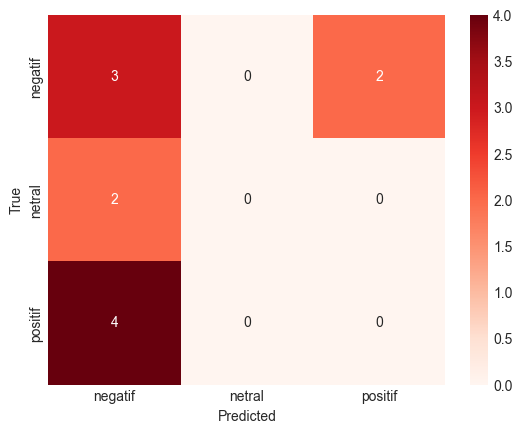

In [71]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_) 
sns.heatmap(cm, annot=True, 
            fmt="d", xticklabels=clf.classes_, 
            yticklabels=clf.classes_, 
            cmap="Reds") 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.show()

In [ ]:
import pickle 
pickle.dump(clf, open("nb_wayang_sa", "wb")) 
pickle.dump(vectorizer, open("tfidf_wayang_sa", "wb"))